## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

## Read in the training data

In [2]:
df_train = pd.read_csv('heart_train.csv')
#drop the variables not described in the pdf key
df_train = df_train.drop(['oldpeak','slp','thall'],axis=1)
#drop the rows which have caa with a value of 4
df_train = df_train[df_train['caa']!=4]
df_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
279,57,0,0,140,241,0,1,123,1,0,0
280,45,1,3,110,264,0,1,132,0,0,0
281,68,1,0,144,193,1,1,141,0,2,0
282,57,1,0,130,131,0,1,115,1,1,0


# EDA

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 283
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       279 non-null    int64
 1   sex       279 non-null    int64
 2   cp        279 non-null    int64
 3   trtbps    279 non-null    int64
 4   chol      279 non-null    int64
 5   fbs       279 non-null    int64
 6   restecg   279 non-null    int64
 7   thalachh  279 non-null    int64
 8   exng      279 non-null    int64
 9   caa       279 non-null    int64
 10  output    279 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [4]:
df_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,54.569892,0.677419,0.964158,131.666667,245.684588,0.154122,0.534050,149.964158,0.322581,0.670251,0.544803
std,9.123530,0.468304,1.034724,17.589647,51.774561,0.361714,0.520882,22.678678,0.468304,0.936208,0.498884
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.500000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,3.000000,1.000000


## Assumptions about the Data

- Assumption 1: Since it is not specified, I am assuming that male = 1 and  female = 0 in  the sex column.
- Assumption 2: There seem to be more variables in the testing data than there are described in the assignment pdf. This means that I have no information on what  these variables mean or pertain to. Therefore I  will be removing them from the dataframe to avoid any mistakes that could occur using variables that I am unaware of.
- Assumption 3: In the pdf the number of major blood vessels is referred with the variable ca. In the data this is referred to as caa. I am assuming these two are the same.
- Assumption 4: It is specified that the variable ca can  only be in range 0-3 however in the  data this variables contains five instances of  4. I am assuming these are mistakes and removed the rows that contained these values.

### Plot Histograms of each variable

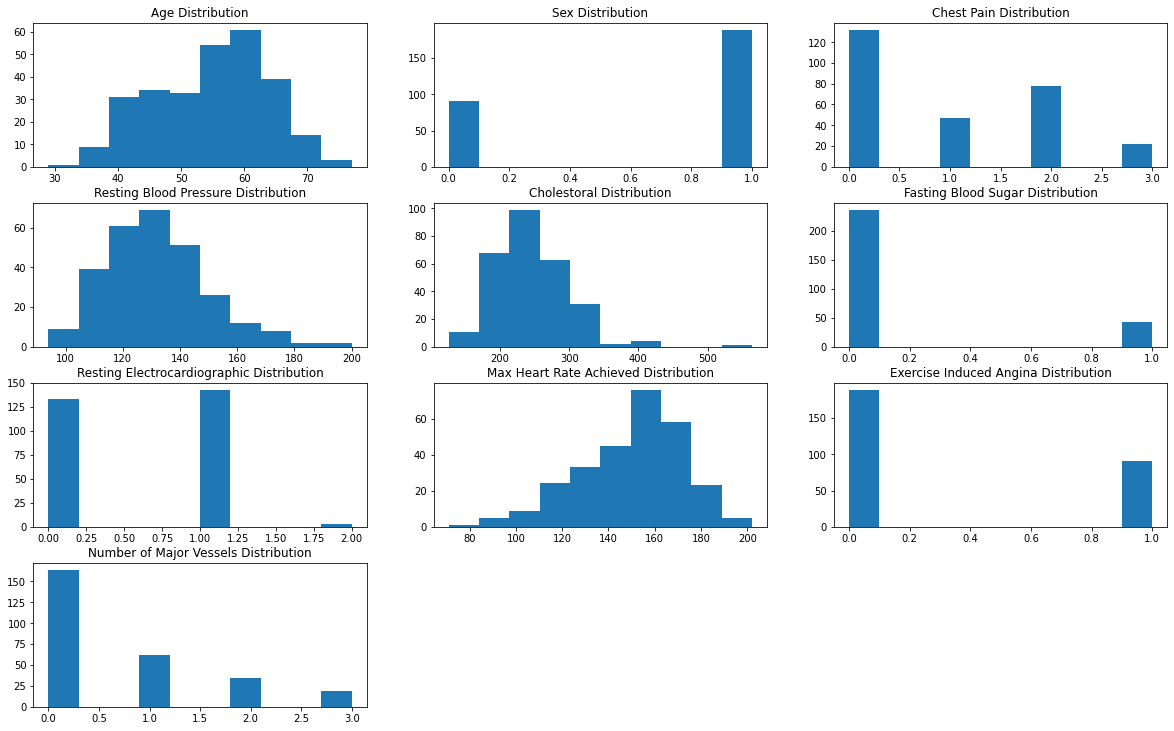

In [5]:
#plotting age
plt.subplot(4,3,1)
plt.hist(df_train['age'])
plt.title('Age Distribution')

#plotting sex
plt.subplot(4,3,2)
plt.hist(df_train['sex'])
plt.title('Sex Distribution')

#plotting cp
plt.subplot(4,3,3)
plt.hist(df_train['cp'])
plt.title('Chest Pain Distribution')

#plotting trtbps
plt.subplot(4,3,4)
plt.hist(df_train['trtbps'])
plt.title('Resting Blood Pressure Distribution')

#plotting chol
plt.subplot(4,3,5)
plt.hist(df_train['chol'])
plt.title('Cholestoral Distribution')

#plotting fbs
plt.subplot(4,3,6)
plt.hist(df_train['fbs'])
plt.title('Fasting Blood Sugar Distribution')

#plotting restecg
plt.subplot(4,3,7)
plt.hist(df_train['restecg'])
plt.title('Resting Electrocardiographic Distribution')

#plotting thalachh
plt.subplot(4,3,8)
plt.hist(df_train['thalachh'])
plt.title('Max Heart Rate Achieved Distribution')

#plotting exng
plt.subplot(4,3,9)
plt.hist(df_train['exng'])
plt.title('Exercise Induced Angina Distribution')

#plotting caa
plt.subplot(4,3,10)
plt.hist(df_train['caa'])
plt.title('Number of Major Vessels Distribution')

plt.subplots_adjust(right = 2.75,top = 2.5,hspace =0.25)
plt.show()

### Basic Insights/Overviews of the Variables

- Age: The mean age of the patients is 54 years old with the majority of patients being above 50 and very little being below 40.
- Sex: Assume that male = 1 and female = 0. There are almost double  the amount of males in the data than females. 
- CP (Chest Pain): Typical angina is the most common type of chest pain. Next most common is non-aginal pain and then atypical angina and asymptomatic.  
- Resting Blood Pressure: The distribution of the blood pressure is slightly right skewed, it seems to be the case that few people have extremely high blood pressure
- Cholestoral: The cholestoral seems to be centered around 250 with few extremely high values.
- Fasting Blood Sugar: The majority of patients have a fasting blood sugar of less than 120. 
- Resting Electrocardiographic Results: Approximately equal number of patients have normal results and ST-T wave abnormality. An extremely small amount have definite left ventricular hypertrophy.
- Max Heart Rate Achieved Distribution: This has a mean of 150 with a standard deviation of 22. Yet there are some patients that reach extremely high and extremely low heart rates.
- Exercise Induced Angina: A little less than half of patients reported no exercise induced angina while the other reported that they did experience this.
- Number of Major Vessels: Most patients report 0 and this decreases as the amount of vessels increases.


### Some Additional EDA Questions

1. Are there any features that are highly correlated with one another?
2. I suspect there may be a relationship between age and the risk of a heartattack, what kind of relationship is there if any?
3. Is there a relationship between sex and the risk of heart attack?

### EDA Question 1

<AxesSubplot:>

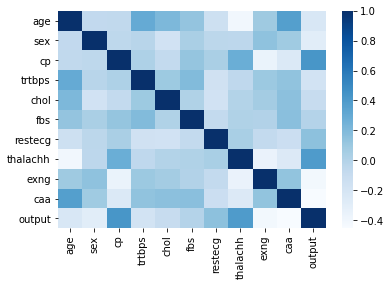

In [6]:
R = df_train.corr()
sns.heatmap(R,cmap="Blues")

From the colour map I can determine that there are not many strong correlations between the variables which is good news for me.

###  EDA Question 2
To address this question I plotted the age distributions coloured differently depending on the risk of heartattack.

d:\precisionos assign\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\precisionos assign\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


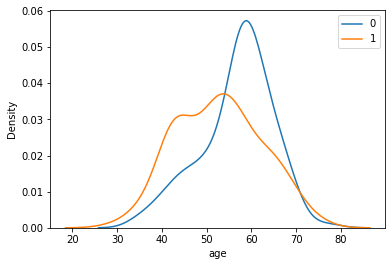

In [7]:
sns.distplot(df_train[df_train['output']==0]['age'],hist=False,kde=True,label="0")
sns.distplot(df_train[df_train['output']==1]['age'],hist=False,kde=True,label="1")
plt.legend()
plt.show()

A  surprising insight came from this  graph. I originally expected that the older a  patient got the higher the risk of  a heart attack would become. This graph infact shows the opposite, it shows that of the patients at higher risk for a heart attack, a large amount of them  are younger and this  drops  off at older age.

### EDA Question 3

d:\precisionos assign\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\precisionos assign\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


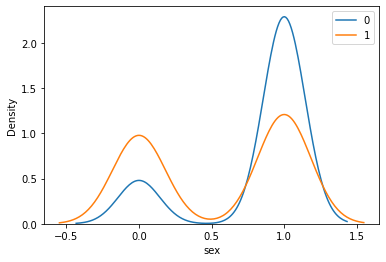

In [8]:
sns.distplot(df_train[df_train['output']==0]['sex'],hist=False,kde=True,label="0")
sns.distplot(df_train[df_train['output']==1]['sex'],hist=False,kde=True,label="1")
plt.legend()
plt.show()

From this plot it can be determined that one sex has many more patients at higher risk of a heart attack. In my assumptions earlier I assumed that 0 meant female and 1 meant male. However, this result makes me think I may be wrong since I know from domain knowledge that men develop heart disease earlier than women. Either way the sex correlating to 0 has a much higher proportion of patients with high risk of heartattacks than not. The sex correlating to 1 has about a 50/50 split among both groups.

# Pre-Processing

###  Scaling the Features
In this step I scaled the features to be between 0 and 1. I used the min max scaler because it is less sensitive to outliers.

In [9]:
scaler = prep.MinMaxScaler(feature_range=(0,1))
df_train_scaled = scaler.fit_transform(df_train.drop(["output"],axis=1))
df_train_scaled = pd.DataFrame(df_train_scaled)
df_train_scaled.columns = df_train.drop(["output"],axis=1).columns
df_train_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.000000
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.000000
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.000000
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.000000
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
274,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.000000
275,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.000000
276,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.666667
277,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.333333


### Read and Pre-Process the Testing Data
Bring in the testing data and prepare it to be predicted on by scaling it

In [10]:
df_test = pd.read_csv("heart_test.csv")
#drop the variables not described in the pdf key
df_test = df_test.drop(['oldpeak','slp','thall'],axis=1)

In [11]:
test_scaler = prep.MinMaxScaler(feature_range=(0,1))
df_test_scaled = test_scaler.fit_transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled)
df_test_scaled.columns = df_test.columns
df_test_scaled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.962963,0.0,0.666667,0.671053,0.568720,0.0,0.5,0.609195,0.0,0.000000
1,0.962963,0.0,0.666667,0.736842,1.000000,0.0,0.0,0.643678,0.0,0.000000
2,0.444444,0.0,0.666667,0.473684,0.753555,0.0,0.0,0.540230,0.0,0.333333
3,0.333333,1.0,0.333333,0.342105,0.454976,0.0,0.0,0.977011,0.0,0.000000
4,0.222222,1.0,0.000000,0.000000,0.279621,0.0,0.0,0.609195,1.0,0.000000
5,0.518519,0.0,0.000000,0.342105,0.545024,0.0,0.0,0.551724,0.0,0.000000
6,0.000000,1.0,0.666667,0.473684,0.815166,0.0,0.0,1.000000,0.0,0.000000
7,0.481481,1.0,0.333333,0.210526,0.834123,0.0,0.5,0.885057,0.0,0.000000
8,0.185185,1.0,0.666667,0.473684,0.407583,0.0,0.0,0.977011,0.0,0.000000
9,0.518519,1.0,0.000000,0.250000,0.630332,0.0,0.5,0.000000,1.0,0.666667


### Create the Output to the Training data

In [12]:
df_train_output = df_train['output']
df_train_output

0      1
1      1
2      1
3      1
4      1
      ..
279    0
280    0
281    0
282    0
283    0
Name: output, Length: 279, dtype: int64

# The Model
I decided to use a linear support vector classifier as my model as using a single hyperplane to spit the data works well when there are only two outcomes. I also know that this is a popular model to be used when classifying datasets on the smaller side.

### Perform a Testing Model
This model will train on a train test split of the training data since the training data is the only data that I have labels for. This way I can get a sense of if the model is doing well or not before I make my unverifiable predictions on the actual testing data that doesn't have labels.

In [13]:
feature_train, feature_test, label_train, label_test = train_test_split(df_train_scaled,df_train_output)

In [14]:
linear_svc_test = LinearSVC(dual=False)
linear_svc_test.fit(feature_train,label_train)
accur = linear_svc_test.score(feature_train,label_train)
print("Accuracy on training data is ",accur)

Accuracy on training data is  0.8325358851674641


In [15]:
prediction = linear_svc_test.predict(feature_test)
label_test = pd.DataFrame(label_test)
label_test.index = range(len(label_test['output']))
correct = 0
for i in range(len(prediction)):
    if prediction[i] == label_test["output"][i]:
        correct +=1
print(correct,"/",len(prediction), "or", (correct/len(prediction)*100),"% of the testing prediction were correct")

58 / 70 or 82.85714285714286 % of the testing prediction were correct


### Final Model
Now that I confirmed that the model is making sufficient predicitons I will train the model on the real testing data and make my final predictions.

In [16]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(df_train_scaled,df_train_output)
accur = linear_svc.score(df_train_scaled,df_train_output)
print("Accuracy on training data is ",accur)

Accuracy on training data is  0.8315412186379928


Below are my final predictions and a dataframe with the predictions attached in a new column

In [17]:
final_prediction = linear_svc.predict(df_test_scaled)
final_prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
df_test['output']=final_prediction
df_test.to_csv(path_or_buf='results/')

In [19]:
df_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,65,0,2,155,269,0,1,148,0,0,1
1,65,0,2,160,360,0,0,151,0,0,1
2,51,0,2,140,308,0,0,142,0,1,1
3,48,1,1,130,245,0,0,180,0,0,1
4,45,1,0,104,208,0,0,148,1,0,0
5,53,0,0,130,264,0,0,143,0,0,1
6,39,1,2,140,321,0,0,182,0,0,1
7,52,1,1,120,325,0,1,172,0,0,1
8,44,1,2,140,235,0,0,180,0,0,1
9,53,1,0,123,282,0,1,95,1,2,0
